In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
# The curl command is a tool used to transfer data from or to a server using various protocols such as HTTP, FTP, SFTP, etc. In this script, the curl command is used to download a file from a specified URL.
# The ! symbol is not actually part of the command itself, but rather it is a symbol recognized by certain command-line interfaces and shells, such as the Jupyter Notebook or Google Colab

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0  786M    0  102k    0     0  52341      0  4:22:39  0:00:02  4:22:37 52393
  0  786M    0 1860k    0     0   621k      0  0:21:36  0:00:02  0:21:34  621k
  0  786M    0 4898k    0     0  1218k      0  0:11:00  0:00:04  0:10:56 1219k
  0  786M    0 6429k    0     0  1242k      0  0:10:48  0:00:05  0:10:43 1242k
  0  786M    0 6946k    0     0  1144k      0  0:11:44  0:00:06  0:11:38 1419k
  0  786M    0 7073k    0     0   994k      0  0:13:29  0:00:07  0:13:22 1365k
  1  786M    1 9328k    0     0  1166k      0  0:11:30  0:00:07  0:11:23 1493k
  1  786M    1 11.6M    0     0  1329k      0  0:10:06  0:00:08  0:09:58 1418k
  1  786M    1 14.7M    0     0  1507k      0  0:08

In [6]:
# !unzip -q kagglecatsanddogs_5340.zip
# !ls
#the ! symbol tells the notebook that the command that follows should be executed in the command-line interface rather than as a Python command. 
!expand -q kagglecatsanddogs_5340.zip -d kagglecatsanddogs_5340
# To list the contents of the current directory 
!dir
# if you dont put the ! symbol, the command will be executed as a Python command thus it will bring an error e.g <function dir>

Microsoft (R) File Expansion Utility
Copyright (c) Microsoft Corporation. All rights reserved.

Unrecognized switch -q.
 Volume in drive D is New Volume
 Volume Serial Number is 60EB-6728

 Directory of d:\Ml journey

03/23/2023  11:45 AM    <DIR>          .
03/23/2023  12:28 PM            25,560 imageclassification.ipynb
03/23/2023  11:50 AM       824,887,076 kagglecatsanddogs_5340.zip
03/23/2023  11:22 AM                 0 ml2.ipynb
03/22/2023  01:45 PM           193,536 mlcourse.ipynb
               4 File(s)    825,106,172 bytes
               1 Dir(s)  236,538,097,664 bytes free


In [8]:
# the above lists the contents of the pet images folder
!dir PetImages

 Volume in drive D is New Volume
 Volume Serial Number is 60EB-6728

 Directory of d:\Ml journey\PetImages

03/23/2023  01:15 PM    <DIR>          .
03/23/2023  01:23 PM    <DIR>          ..
03/23/2023  01:15 PM    <DIR>          Cat
03/23/2023  01:21 PM    <DIR>          Dog
               0 File(s)              0 bytes
               4 Dir(s)  233,966,481,408 bytes free


FILTER OUT CORRUPTED IMAGES

In [10]:
# THE import below allows us to access and edit files stored on our local computer
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1578 images


GENERATE A DATASET

function is called to create the datasets. The function takes the following arguments:
directory: The directory where the image files are located.
validation_split: The percentage of images to use for validation. In this case, 20% of the images are used for validation.
subset: The subset of images to use for the datasets. In this case, both the training and validation datasets are created.
seed: The random seed to use for shuffling the images.
image_size: The size to resize the images to. In this case, the images are resized to (180, 180).
batch_size: The batch size to use for training and validation.

In [11]:
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "PetImages",
    # The percentage of images to use for validation. In this case, 20% of the images are used for validation.
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Using 4684 files for validation.


In [15]:
# the shape of rhe training dataset
print(train_ds.cardinality())
# the cardinality is used to get the number of batches in the dataset

tf.Tensor(147, shape=(), dtype=int64)


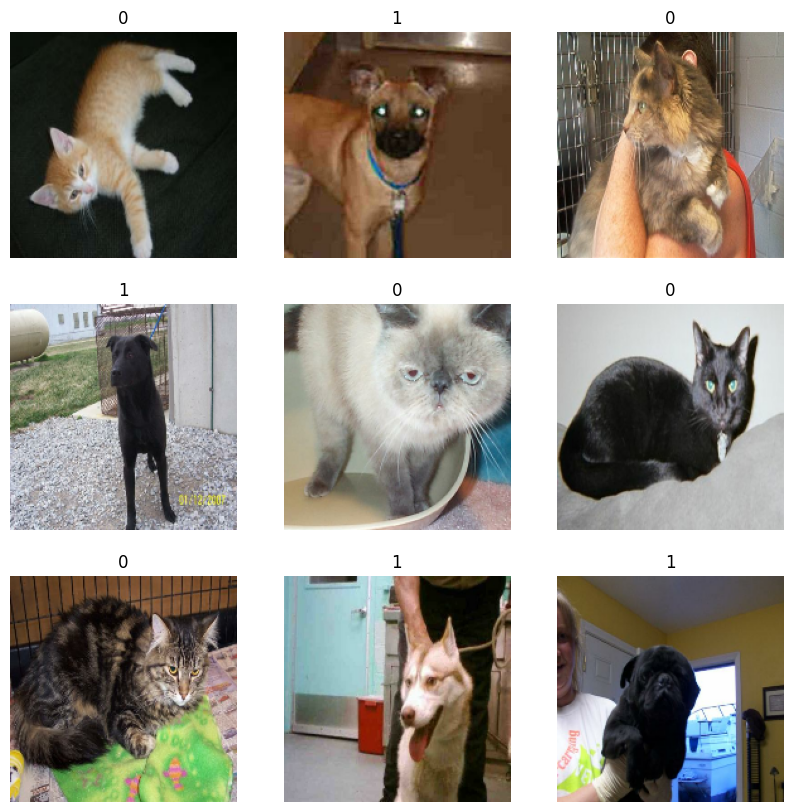

In [19]:
# show me the first 9 images from the training set
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# The take(1) method returns a dataset containing only one batch of data.
for images, labels in train_ds.take(5):
    
    for i in range(9):
        # The subplot() function in the matplotlib library allows you to plot different things in the same figure.
        # The subplot() function takes three arguments: nrows, ncols, and index.
        # A subplot is created for each image and label using plt.subplot(3, 3, i + 1). The subplot is placed in a 3x3 grid with a position corresponding to i + 1.
        ax = plt.subplot(3, 3, i + 1)
        # The image is displayed in the subplot using plt.imshow(images[i].numpy().astype("uint8")). The numpy() method is used to convert the image from a TensorFlow tensor to a NumPy array, and the astype("uint8") method is used to convert the data type of the array to unsigned 8-bit integers.
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


USING DATA AUGMENTATION
When you don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random yet realistic transformations to the training images, such as random horizontal flipping or small random rotations. This helps expose the model to different aspects of the training data while slowing down OVERFITTING.

In [20]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

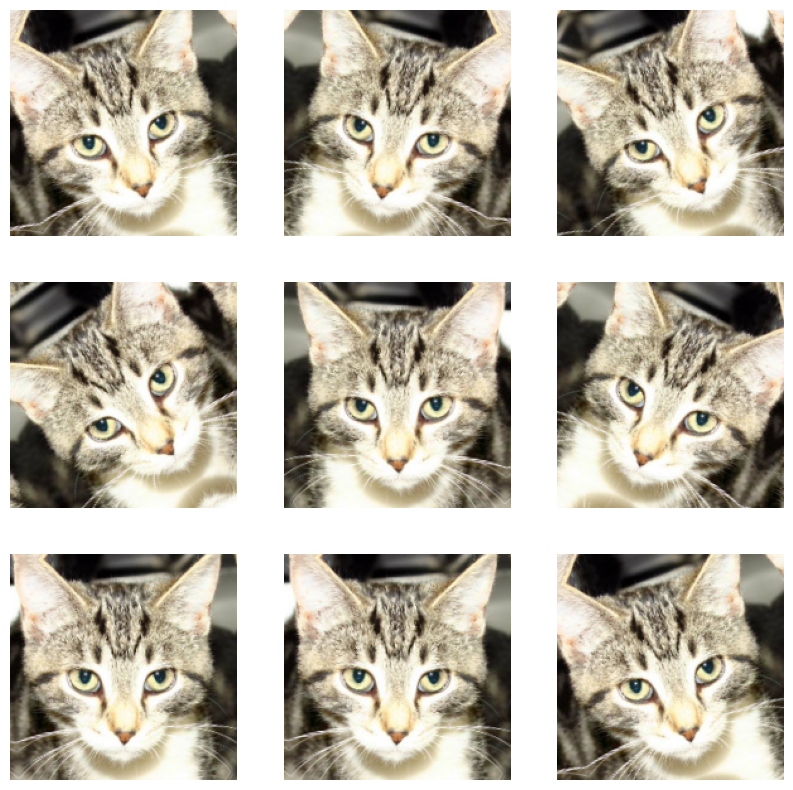

In [21]:
# visualising the augumented data.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        # The data_augmentation object created by the Sequential model in Keras is not a function, but it is an object that has a __call__ method, which allows it to be called as if it were a function.
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

STANDARDIZE THE DATA


Our image are already in a standard size (180x180), as they are being yielded as contiguous float32 batches by our dataset. However, their RGB channel values are in the [0, 255] range. This is not ideal for a neural network; IN GENERAL, YOU SHOULD SEEK TO MAKE YOUR INPUT VALUES SMALL. Here, we will standardize values to be in the [0, 1] range by using a Rescaling layer.

In [24]:
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y))

In [25]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [27]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


TRAIN THE MODEL

In [28]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/25
147/147 [==============================] - 14587s 99s/step - loss: 0.6423 - accuracy: 0.6481 - val_loss: 0.7583 - val_accuracy: 0.4957
Epoch 2/25
147/147 [==============================] - 13493s 92s/step - loss: 0.5123 - accuracy: 0.7551 - val_loss: 1.0860 - val_accuracy: 0.4957
Epoch 3/25
 52/147 [=========>....................] - ETA: 2:19:39 - loss: 0.4273 - accuracy: 0.8032